In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

(basics-of-probability-theory)=
# Basics of Probability Theory

(logical-sentences)=
## Logical sentences
A logical sentence is a statement about the world that can be true or false.
Science makes such statements all the time.
For example, "the circumference of the Earth is 40,075 km (plus or minus 1 km)" is a logical sentence.
We will not go any deeper into the formal definition of logical sentences.
But we will require that the set of logical sentences we are working with is *consistent*.
That is, it does not contain contradictions.

We will denote logical sentences with capital letters: $A$, $B$, $C$, etc.
We form new logical sentences from old ones using the following logical connectives:
+ $\text{not}\;A \equiv \neg A$: the logical sentence that is true when $A$ is false and false when $A$ is true.
+ $A\;\text{and}\;B \equiv A, B \equiv AB$: the logical sentence that is true when $A$ and $B$ are true and false otherwise.
+ $A\;\text{or}\;B \equiv A+B$: the logical sentence that is true when $A$ or $B$ are true and false otherwise.

(probability-as-a-representation-of-our-state-of-knowledge)=
## Probability as a representation of our state of knowledge

Let's call $I$ the logical sentence containing all *information* you have now.
And I am talking about absolutely everything: 
+ What your parents taught you,
+ What you learned in school, what you learned in college,
+ What your eyes see right now on some scientific instruments.

Now consider a logical sentence $A$ that says something about the world.
For example, $A$ could be "The result of the next coin toss John performs will be heads."
Or anything.
We are uncertain about $A$.
We do not know if it is true or false.
We could use the information $ I $ to say something more about $ A $.
Maybe we believe that it is more likely that $A$ is true than false.
Maybe the opposite.

Probability theory is about this problem.
It gives us a number $p(A|I)$.
We read $p(A|I)$ as "the probability that $A$ is true given that we know $I$."
It quantifies our degree of belief that $A$ is true given that we know $I$.
We say that $p(A|I)$ represents our knowledge about $A$ given $I$.

## But what about frequencies?

In introductory courses to probability or statistics, we usually learn that the probability of an event is the frequency with which it occurs in nature.
This interpretation is valid if the event is something that indeed occurs repeatedly.
However, it is pretty restrictive.

In particular, what can we say about an event that can happen only once?
For example, what is the probability that life on Earth will end in a billion years?
It is not possible to repeat this experiment.
It is not even possible to observe its outcome.
The frequency interpretation of probability is not applicable.
However, we would like to use probability to quantify our degree of belief that life on Earth will end in a billion years.
It makes intuitive sense that we can do this.
We want to do this.
Scientists and engineers think like this all the time.

But is our approach compatible with the frequency interpretation?
It can be shown, see {cite}`jaynes03` for the proof, that our approach is indeed compatible with the frequency interpretation.
That is, when events occur repeatedly, then the probabilities do become frequencies.


## The common sense assumptions that give rise to the basic probability rules.

> Probability theory is nothing but common sense reduced to calculation. Pierre-Simon Laplace, Théorie analytique des probabilités (1814)

Consider the following three ingredients:
+ A: a logical sentence
+ B: another logical sentence
+ I: all the information we know

Now, let's try to make a robot that can argue under uncertainty.
It should be able to take logical sentences (such as $A$ and $B$ above) and argue about them using all its information.
What sort of system should govern this robot?
The following desiderata, see {cite:p}`jaynes03`, seem reasonable:

+ Real numbers represent degrees of plausibility.
+ The system should have a qualitative correspondence to common sense.
+ The system should be consistent in the sense that:
    - If there are two ways to calculate a degree of plausibility, each way must lead to the same result.
    - The robot should take into account all evidence relevant to a question.
    - Equivalent plausibility assignments must represent equivalent states of knowledge.
 
[Cox's theorem](https://en.wikipedia.org/wiki/Cox%27s_theorem) shows that:

> The desiderata are enough to derive the rules of probability theory.

### Talking about probabilities

We read $p(A|BI)$ as:

+ the probability of $A$ being true given that we know that $B$ and $I$ are true; or
+ the probability of $A$ being true given that we know that $B$ is true; or
+ the probability of $A$ given $B$.

### Interpretation of probabilities

The probability $p(A|BI)$ is a number between 0 and 1, quantifying the degree of plausibility that $A$ is true given $B$ and $I$.
Specifically:

+ $p(A|B,I) = 1$ when we are certain that $A$ is true if $B$ is true (and I).
+ $p(A|B,I) = 0$ when we are certain that $A$ is false if $B$ is true (and $I$).
+ $0< p(A|B,I) < 1$ when we are uncertain about $A$ if $B$ is true (and $I$).
+ $p(A|B,I) = \frac{1}{2}$ when we are completely ignorant about $A$ if $B$ is true (and $I$).

## The rules of probability

Everything in probability theory derives from two rules.
These are direct consequences of the desiderata and Cox's theorem.
They are:

+ The **obvious rule**:

$$
p(A|I) + p(\neg A|I) = 1.
$$

The rule states that $A$ or its negation must be true.
We see why it is vitally important that you refrain from applying probability in a system that includes contradictions.

+ The **product rule** (or Bayes' rule or Bayes' theorem):

$$
p(A,B|I) = p(A|B,I)p(B|I).
$$

The rule states that the probability of $A$ and $B$ is the probability of $A$ given that $B$ is true times the probability that $B$ is true.
Even though the correspondence is not one-to-one, visualizing events using the Venn diagrams helps in understanding the product rule:

:::{figure-md} venn
<img src="../images/venn.png">

Venn diagram.
:::

In this diagram:
+ $p(A,B|I)$ corresponds to the brown area (normalized by the area of I).
+ $p(B|I)$ is the area of $B$ (normalized by the area of $I$).
+ $p(A|BI)$ is the brown area (normalized by the area of $B$).

Understanding the product rule takes some time.
But it is worth it, as it tells us how to update our knowledge as we gather new information.
The product rule is the essence of scientific machine learning.

### Example: Drawing balls from a box without replacement (1/3)

Consider the following information $I$:

> We are given a box with ten balls, 6 of which are red and 4 of which are blue. The box is sufficiently mixed so that we don't know which one we pick when we get a ball from it. We do not put a ball back when we take it out of the box.

:::{figure-md} urn
<img src="../images/urn.png">

A box with balls.
:::

Now, let's draw the first ball.
Here is the graphical causal model up to this point:

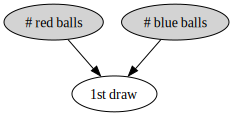

In [2]:
from graphviz import Digraph
gu1 = Digraph('Urn1')
gu1.node('reds', label='# red balls', style='filled')
gu1.node('blues', label='# blue balls', style='filled')
gu1.node('first', label='1st draw')
gu1.edge('reds', 'first')
gu1.edge('blues', 'first')
gu1.render('urn1_graph', format='png')
gu1

Now, let's say that we draw the first ball.
Let $B_1$ be the sentence:

> The first ball we draw is blue.

What is the probability of $B_1$?
Our intuition tells us to set:

$$
p(B_1|I) = \frac{4}{10} = \frac{2}{5}.
$$

What just did has a name.
It is known as the *principle of insufficient reason*.
We will learn more about it later.

We can now use the **obvious rule** to find the probability of drawing a red ball, i.e., of $\neg B_1$.
Of course, $\neg B_1$ is just the sentence:

> The first ball we draw is red.

So, let's call it also $R_1$.
It is:

$$
p(R_1|I) = p(\neg B_1|I) = 1 - p(B_1|I) = 1 - \frac{2}{5} = \frac{3}{5}.
$$

Now let's do something else.
Let's say we observe the first draw and we want to calculate the probability of drawing a blue ball on the second draw.
Consider the causal graph of the problem.
We need to fill the node corresponding to the first draw with color:

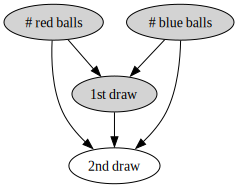

In [3]:
gu3 = Digraph('Urn3')
gu3.node('reds', label='# red balls', style='filled')
gu3.node('blues', label='# blue balls', style='filled')
gu3.node('first', label='1st draw', style='filled')
gu3.node('second', label='2nd draw')
gu3.edge('reds', 'first')
gu3.edge('blues', 'first')
gu3.edge('first', 'second')
gu3.edge('reds', 'second')
gu3.edge('blues', 'second')
gu3.render('urn3_graph', format='png')
gu3

Consider the sentence $R_2$:

> The second ball we draw is red.

Suppose we know that $B_1$ is true, i.e., the first ball we draw is blue.
What is the probability of $R_2$ given that $B_1$ is true?
We can use common sense to find this probability:
+ We had ten balls, six red and four blue.
+ Since $B_1$ is true (the first ball was blue), we now have six red and three blue balls.
+ Therefore, the probability that we draw a red ball next is:

$$
p(R_2|B_1,I) = \frac{6}{9} = \frac{2}{3}.
$$

Similarly, we can find the probability that we draw a red ball in the second draw given that we drew a red ball in the first draw:
+ We had ten balls, six red and four blue.
+ Since $R_1$ is true (the first ball is red), we now have five red and four blue balls.
+ Therefore, the probability that we draw a red ball next is:

$$
p(R_2|R_1,I) = \frac{5}{9}.
$$

Okay, let's do something more challenging.
Let's consider a second draw without observing the result of the first draw.
Here is the causal graph (notice that we do not shade the first draw):

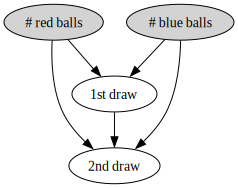

In [4]:
gu2 = Digraph('Urn2')
gu2.node('reds', label='# red balls', style='filled')
gu2.node('blues', label='# blue balls', style='filled')
gu2.node('first', label='1st draw')
gu2.node('second', label='2nd draw')
gu2.edge('reds', 'first')
gu2.edge('blues', 'first')
gu2.edge('first', 'second')
gu2.edge('reds', 'second')
gu2.edge('blues', 'second')
gu2.render('urn2_graph', format='png')
gu2

Let's find the probability that we will draw a blue ball in the first draw (A) and a red ball in the second draw (B).
We have to use the **product rule**:

$$
p(B_1, R_2|I) = p(R_2|B_1,I) p(B_1|I) = \frac{2}{3}\frac{2}{5} = \frac{4}{15}.
$$

### Other rules of probability theory

All other rules of probability theory can be derived from the two basic rules.
Here are some examples.

#### Extension of the obvious rule
All other rules of probability theory can be derived from the two basic rules.
Here are some examples.

#### Extension of the obvious rule
For any two logical sentences $A$ and $B$ we have:

$$
p(A + B|I) = p(A|I) + p(B|I) - p(AB|I).
$$

In words: the probability of $A$ or $B$ is the probability that A is true plus the probability that $B$ is true minus the probability that both A and B are true.
It is easy to understand the rule intuitively by looking at the [Venn diagram](venn).

The probability $p(A+B|I)$ is the area of the union of A with B (normalized by I).
This area is indeed the area of A (normalized by I) plus the area of B (normalized by I) minus the area of A and B (normalized by I), which was double-counted.

```{admonition} Here is the proof.
:class: dropdown
$$
\begin{split}
p(A+B|I) &= 1 - p(\neg (A+B)|I)\\
&= 1 - p(\neg A, \neg B|I)\;\text{(obvious rule)}\\
&= 1 - p(\neg A|\neg B, I)p(\neg B|I)\;\text{(product rule)}\\
&= 1 - \left[1 - p(A|\neg B, I)\right]p(\neg B|I)\;\text{(obvious rule)}\\
&= 1 - p(\neg B|I) + p(A|\neg B, I)p(\neg B|I)\\
&= 1 - p(\neg B|I) + p(A\neg B|I)\;\text{(product rule)}\\
&= 1 - p(\neg B|I) + p(\neg B|A,I) p(A|I)\;\text{(product rule)}\\
&= 1 - p(\neg B|I) + \left[1 - p(B|A,I)\right]p(A|I)\;\text{(obvious rule)}\\
&= 1 - p(\neg B|I) + p(A|I) - p(B|A,I)p(A|I)\\
&= 1 - \left[1 - p(B|I)\right] + p(A|I) - p(B|A,I)p(A|I)\;\text{obvious rule})\\
&= p(A|I) + p(B|I) - p(B|A,I)p(A|I)\\
&= p(A|I) + p(B|I) - p(AB|I)\;\text{(product rule)}.
\end{split}
$$
```

### The sum rule

The sum rule is the final rule we will consider in this lecture.
It is one of the most important rules.
**You have to memorize it.**
It goes as follows.

Consider the sequence of logical sentences $B_1,\dots,B_n$ such that:
+ One of them is true:

$$
p(B_1 + \dots + B_n|I) = 1.
$$

+ They are mutually exclusive:

$$
p(B_iB_j|I) = \delta_{ij} = \begin{cases}1,&\;\text{if}\;i=j,\\ 0,&\;\text{otherwise}.\end{cases}
$$

Then, for any logical sentence $A$, we have:

$$
p(A|I) = \sum_{i=1}^n p(AB_i|I) = \sum_{i=1}^n p(A|B_i,I)p(B_i|I).
$$

Again, this requires a bit of meditation.
You take any logical sentence A and set of exclusive but exhaustive possibilities $B_1,\dots, B_n$, and you break down the probability of $A$ in terms of the probabilities of the $B_i$'s.
The Venn diagrams help to understand the situation:

:::{figure-md} venn_sum_rul
<img src="../images/venn_sum_rule.png">

Venn diagram demonstration of the sum rule.
:::

```{admonition} The sum rule can be trivially proved by induction using only the obvious rule and the product rule.
It is instructive to go through the proof once.
:class: dropdown
For $n=2$ we have:

$$
\begin{split}
p(A|I) &= p(A\;\text{and}\;(B_1\;\text{or}\;B_2)|I)\\
&= p\left((A\;\text{and}\;B_1)\;\text{or}\;(A\;\text{and}\;B_2)|I\right)\\
&= p(A\;\text{and}\;B_1|I) + p(A\;\text{and}\;B_2|I) - p\left((A\;\text{and}\;B_1)\;\text{and}\;(A\;\text{and}\;B_2)|I\right)\\
&= p(AB_1|I) + p(AB_2|I) - p(AB_1B_2|I)\\
&= p(AB_1|I) + p(AB_2|I),
\end{split}
$$

because 

$$
p(AB_1B_2|I) = p(B_1B_2|I)p(A|I) \le p(B_1B_2|I) = 0.
$$

And then, assume that it holds for $n$, you can easily show that it also holds for $n+1$ completing the proof.
```

### Example: Drawing balls from a box without replacement (2/3)

Let us consider the probability of getting a red ball in the second draw without observing the first draw.
We have two possibilities for the first draw.
We got a blue ball ($B_1$ is true) or a red ball (R_1 is true).
In other words, $B_1$ and $R_1$ cover all possibilities and are mutually exclusive.
We can use the sum rule:

$$
\begin{split}
p(R_2|I) &= p(R_2|B_1,I)p(B_1|I) + p(R_2|R_1,I)p(R_1|I)\\
&= \frac{2}{3}\frac{2}{5} + \frac{5}{9}\frac{3}{5}\\
&= 0.6.
\end{split}
$$

### Example: Drawing balls from a box without replacement (3/3)

If you paid close attention, in all our examples, the conditioning we did followed the causal links.
For instance, we wrote $p(R_2|B_1 I)$ for the probability of getting a red ball in the second draw after observing the blue ball in the first draw.
However, conditioning on stuff **does not have to follow causal links**.
It is legitimate to ask what the probability of a blue ball is in the first draw, given that you have observed that the result of the second draw is a red ball.
I visualize the situation in the following graph:

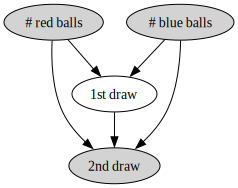

In [5]:
gu4 = Digraph('Urn4')
gu4.node('reds', label='# red balls', style='filled')
gu4.node('blues', label='# blue balls', style='filled')
gu4.node('first', label='1st draw')
gu4.node('second', label='2nd draw', style='filled')
gu4.edge('reds', 'first')
gu4.edge('blues', 'first')
gu4.edge('first', 'second')
gu4.edge('reds', 'second')
gu4.edge('blues', 'second')
gu4.render('urn4_graph', format='png')
gu4

You can write down the mathematical expression $p(B_1|R_2, I)$.
It does not mean that $R_2$ is causing $B_1$.
What happens here is that observing $R_2$ changes your state of knowledge about $B_1$.
It is an example of information flowing in the reverse order of a causal link and a quintessential example of the inverse problem.
Let's solve it analytically:

$$
\begin{split}
p(B_1|R_2,I) &= \frac{p(B_1,R_2|I)}{p(R_2|I)}\\
&= \frac{\frac{4}{15}}{0.6}\\
&\approx 0.44.
\end{split}
$$

The probability is greater than that of drawing a blue ball in the first place, $p(B_1|I) = 0.4$.
Does this make sense?
Yes, it does!
Here is what you should think:
+ You draw a ball without seeing it and put it in a box.
+ You draw the second ball, and you see that it is a red one.
+ This means you did not pick this red ball in the first draw.
+ So, it is as if, in the first draw, you had one less red to worry about, which increases the probability of a blue.
+ So, it is as if you had five red balls and four blue balls, giving you a probability of blue $\frac{4}{9}\approx 0.44$.

It is amazing!
It agrees perfectly with the prediction of the product rule.
Recall that one of our desiderata is that if you compute something in two different ways, you should get the same result.
You can rest assured that it is impossible to get the wrong answer as soon as you use the product rule, the sum rule, and logic.